# Using FastAI ULMFiT to complete your assignment


## 0. Setup

In [1]:
from fastai.text import *
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


Mounted at /content/gdrive


## 1. Import the data

In [2]:
# Loaded dataset and lables after creating the folder structure as shown below in Google
text_path = 'gdrive/My Drive/Developer/Datasets/stackoverflow-dataset/title_StackOverflow.txt'
label_path = 'gdrive/My Drive/Developer/Datasets/stackoverflow-dataset/label_StackOverflow.txt'

df_text = pd.read_csv(text_path, sep='\t', names=['text'], header=None)
df_label = pd.read_csv(label_path, sep='\t', names=['label'], header=None)

df = pd.concat([df_label, df_text], axis=1, sort=False)
print('Length of dataset: '+str(len(df.index)))
df.head()

Length of dataset: 20000


,label,text
0,18,How do I fill a DataSet or a DataTable from a LINQ query resultset ?
1,18,How do you page a collection with LINQ?
2,3,Best Subversion clients for Windows Vista (64bit)
3,3,"Best Practice: Collaborative Environment, Bin Directory, SVN"
4,7,Visual Studio Setup Project - Per User Registry Settings


In [3]:
mapping = {
  1: 'wordpress',
  2: 'oracle',
  3: 'svn',
  4: 'apache',
  5: 'excel',
  6: 'matlab',
  7: 'visual-studio',
  8: 'cocoa',
  9: 'osx',
  10: 'bash',
  11: 'spring',
  12: 'hibernate',
  13: 'scala',
  14: 'sharepoint',
  15: 'ajax',
  16: 'qt',
  17: 'drupal',
  18: 'linq',
  19: 'haskell',
  20: 'magento'
}

df['label'] = df['label'].map(mapping)

df.head()

,label,text
0,linq,How do I fill a DataSet or a DataTable from a LINQ query resultset ?
1,linq,How do you page a collection with LINQ?
2,svn,Best Subversion clients for Windows Vista (64bit)
3,svn,"Best Practice: Collaborative Environment, Bin Directory, SVN"
4,visual-studio,Visual Studio Setup Project - Per User Registry Settings


## 2. Create train & validation datasets and FastAI data bunch

In [4]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3)

df_trn.shape, df_val.shape

((14000, 2), (6000, 2))

In [5]:
df_trn.head

<bound method NDFrame.head of                label  \
10333  qt              
2551   visual-studio   
8105   ajax            
14026  osx             
1862   sharepoint      
...           ...      
3163   visual-studio   
8858   bash            
6156   qt              
12581  spring          
1598   matlab          

                                                                                                     text  
10333  Show/hide QDockWidget?                                                                              
2551   Automatic tracking of build number in VS 2005?                                                      
8105   Dynamic height for AJAX Autocomplete Textbox                                                        
14026  Mac OS web sharing and Django                                                                       
1862   Check permission on item in list                                                                    
...                              

In [6]:
# Language model data - use TextLMDataBunch.from_df
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


## 3. Create and Train the Language Model

In [7]:
model_learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.7)

In [8]:
model_learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.956460,4.213740,0.296363,00:06


In [12]:
model_learn.save_encoder('language_learner_model_JESS')

In [11]:
model_path = os.path.join( "gdrive/My Drive/Developer/Datasets/stackoverflow-dataset/language_learner_model_JESS" )

model_learn.export(model_path)

## 4. Using the Language Model to Train the Classifier

In [13]:
model_learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()
model_learn.load_encoder('language_learner_model_JESS')


RNNLearner(data=TextClasDataBunch;

Train: LabelList (14000 items)
x: TextList
xxbos xxmaj show / hide qdockwidget ?,xxbos xxmaj automatic tracking of build number in xxup vs 2005 ?,xxbos xxmaj dynamic height for xxup ajax xxmaj autocomplete xxmaj textbox,xxbos xxmaj mac xxup os web sharing and xxmaj django,xxbos xxmaj check permission on item in list
y: CategoryList
qt,visual-studio,ajax,osx,sharepoint
Path: .;

Valid: LabelList (6000 items)
x: TextList
xxbos xxup linq to xxup sql : xxmaj how xxmaj to xxmaj extend xxmaj an xxmaj entity xxmaj class xxmaj with a xxmaj column xxmaj alias,xxbos xxmaj in xxmaj haskell , what does it mean if a binding " xxunk an existing binding " ?,xxbos xxmaj manually iterating a line of a file | bash,xxbos how to click a text with xxunk for showing a web ?,xxbos xxmaj how important do you think xxmaj xxunk xxmaj xxunk is ?
y: CategoryList
linq,haskell,bash,cocoa,ajax
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_L

In [14]:
model_learn.fit_one_cycle(1, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.404945,1.960368,0.458000,00:06


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [15]:
model_learn.freeze_to(-2)
model_learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.463286,0.892826,0.763333,00:08


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non

In [16]:
model_learn.freeze_to(-3)
model_learn.fit_one_cycle(3, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.958636,0.676694,0.807667,00:10
1,0.748517,0.592545,0.831833,00:11
2,0.713407,0.583151,0.831833,00:11


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non

In [64]:
model_learn.unfreeze()
model_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.573057,0.585733,0.830833,00:16
1,0.522317,0.575836,0.834667,00:15


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non

## 5. Analyzing our results

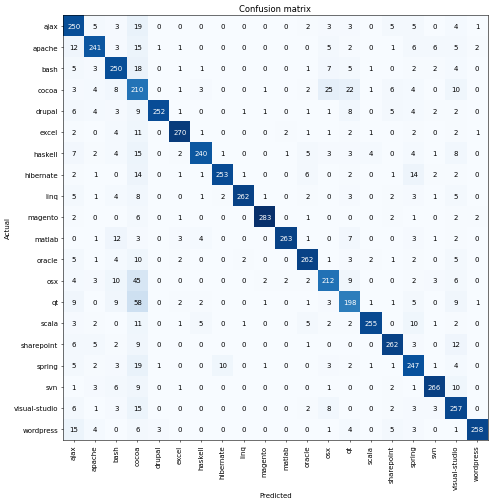

In [17]:
from fastai.train import ClassificationInterpretation
from fastai.vision import *
#preds, y, losses = learn.get_preds(with_loss = True)
#interp = ClassificationInterpretation(data_clas, preds, y, losses)

Matrix_pred = ClassificationInterpretation.from_learner( model_learn )

Matrix_pred.plot_confusion_matrix( figsize = ( 10, 10 ), dpi = 50 )

## 6. Predictions

In [18]:

df.head()

,label,text
0,linq,How do I fill a DataSet or a DataTable from a LINQ query resultset ?
1,linq,How do you page a collection with LINQ?
2,svn,Best Subversion clients for Windows Vista (64bit)
3,svn,"Best Practice: Collaborative Environment, Bin Directory, SVN"
4,visual-studio,Visual Studio Setup Project - Per User Registry Settings


In [19]:
# predictions
x,y,z = model_learn.predict("Visual Studio Setup Project - Per User Registry Settings")

x

Category tensor(18)

In [20]:
content = 'Visual Studio Setup Project - Per User Registry Settings'

x, y, z = model_learn.predict(content)

print( f"prediction = {x}\n" )

prediction = visual-studio



## 7. Export the model

In [22]:
model_path = os.path.join( "gdrive/My Drive/Developer/Datasets/stackoverflow-dataset/text_classifier_learner_JESS_2" )

model_learn.export(model_path)